# Stereoisoers of chiral Werner type complexes #

In [1]:
import itertools

import rdkit.Chem as Chem

from stereomolgraph import StereoMolGraph
from stereomolgraph.stereodescriptors import Tetrahedral, Octahedral
from stereomolgraph.ipython import View2D

View2D.show_atom_numbers = True
View2D.show_h = False
View2D.generate_bond_orders = False
View2D.height = 300
View2D.width = 1000

In [2]:
lig = StereoMolGraph.from_rdmol(Chem.MolFromInchi("InChI=1S/C3H10N2/c1-3(5)2-4/h3H,2,4-5H2,1H3/t3-/m1/s1"))
lig2 = lig.relabel_atoms(mapping ={i: i + len(lig) for i in lig.atoms}, copy=True)
lig3 = lig.relabel_atoms(mapping ={i: i + len(lig) + len(lig2) for i in lig.atoms} ,copy=True)

assert lig  == lig2 == lig3

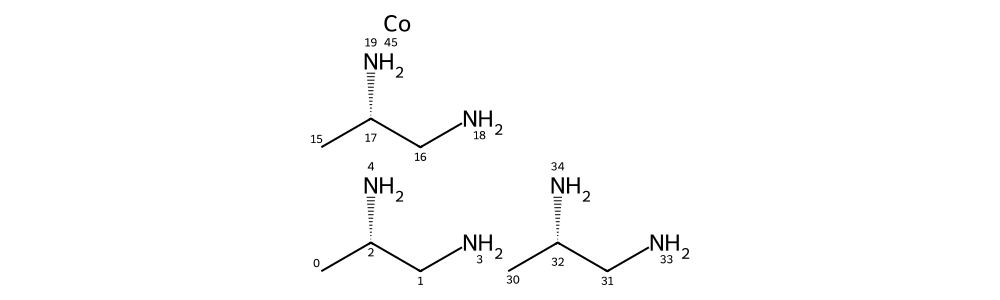

In [3]:
# StereoMolGraph with metal center and 3 not bonded ligands

smg = StereoMolGraph()
metal_id = len(lig) + len(lig2) + len(lig3)
smg.add_atom(metal_id, "Co")

smg = StereoMolGraph.from_composed_molgraphs([smg, lig, lig2, lig3])
smg

In [4]:
# extract all nitrogen pairs

n_pairs = []
for subgraph_atoms in smg.connected_components():
    n_atoms = {atom for atom in subgraph_atoms 
                if smg.get_atom_attribute(atom, "atom_type").symbol == "N"}
    if len(n_atoms) == 2:
        n_pairs.append(n_atoms)


# create Co - N bonds

for i, j in n_pairs:
    smg.add_bond(metal_id, i)
    smg.add_bond(metal_id, j)
    smg.set_atom_stereo(Tetrahedral(atoms = (i, *smg.bonded_to(i)), parity = 1))
    smg.set_atom_stereo(Tetrahedral(atoms = (j, *smg.bonded_to(j)), parity = 1))

In [5]:
stereoisomers = []

# atom ids of trans positions (from Octahedral docstring)
trans_substituents_oct = [(0,1), (2, 4), (3, 5)]

# all possible atom orders of N ligands
n_atom_perm = itertools.permutations(itertools.chain(*n_pairs))

for perm in n_atom_perm:
    # N ligands are not allowed to be trans!
    if all({perm[i], perm[j]} not in n_pairs for  i,j in trans_substituents_oct):
        candidate_stereoisomer = smg.copy()
        stereo = Octahedral(atoms = (metal_id, *perm), parity = 1)
        candidate_stereoisomer.set_atom_stereo(stereo)
        stereoisomers.append(candidate_stereoisomer)

len(stereoisomers)

384

In [6]:
unique_stereoisomers = set(stereoisomers)
len(unique_stereoisomers)

4

In [7]:
[Chem.MolToSmiles(s.to_rdmol(generate_bond_orders=False)) for s in unique_stereoisomers]

['[H]~C(~[H])(~[H])~[C@]1(~[H])~C(~[H])(~[H])~N(~[H])(~[H])~[Co@OH12]23(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~2(~[H])~[H])(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~3(~[H])~[H])~N~1(~[H])~[H]',
 '[H]~C(~[H])(~[H])~[C@]1(~[H])~C(~[H])(~[H])~N(~[H])(~[H])~[Co@OH27]23(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~2(~[H])~[H])(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~3(~[H])~[H])~N~1(~[H])~[H]',
 '[H]~C(~[H])(~[H])~[C@]1(~[H])~C(~[H])(~[H])~N(~[H])(~[H])~[Co@OH28]23(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~2(~[H])~[H])(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~3(~[H])~[H])~N~1(~[H])~[H]',
 '[H]~C(~[H])(~[H])~[C@]1(~[H])~C(~[H])(~[H])~N(~[H])(~[H])~[Co@OH18]23(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~2(~[H])~[H])(~N(~[H])(~[H])~C(~[H])(~[H])~[C@@](~[H])(~C(~[H])(~[H])~[H])~N~3(~[H])~[H])~N~1(~[H])~[H]']